The purpose of this assignment is to determine properties of a planet orbiting a star using both the radial velocity and transit techniques. Such properties include planet radius, mass and density. Orbital properties include inclination angle, semi-major axis, impact parameter and central transit time. 

In [2]:
#install packages
#!pip install mpld3
#!pip install scipy
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import sklearn.mixture
import mpld3
from mpld3 import plugins
eclipse_data = np.load('JSAstroLab2024_eclipse_data_21364029(1).npz')

#To find what is held in the eclipse data set
print(list(eclipse_data.keys()))

['time', 'flux']


Text(0.5, 1.0, 'Eclipse Data Set')

<Figure size 640x480 with 0 Axes>

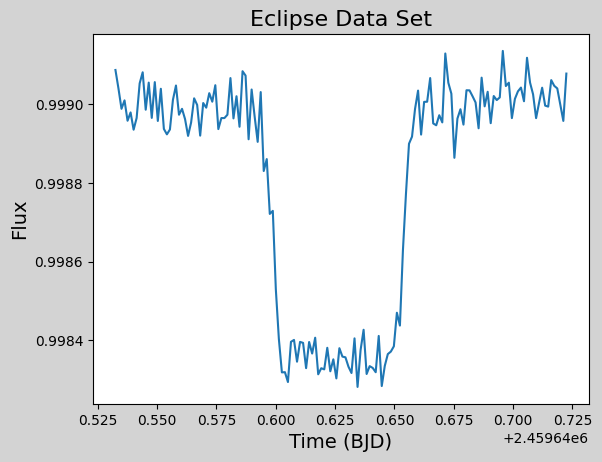

In [3]:
#defining the parameters as time and flux
time, flux = eclipse_data['time'], eclipse_data['flux']

#plotting the parameters
plt.figure()
fig, ax = plt.subplots(facecolor='lightgrey')
plt.plot(time,flux)
plt.xlabel('Time (BJD)', fontsize = '14')
plt.ylabel('Flux', fontsize = '14')
plt.title('Eclipse Data Set', fontsize = '16')

In [5]:
#load rv data
rv_data = np.load('JSAstroLab2024_rv_data_21364029.npz')

#doing the same for rv data set and defining as a list for later use
rv_list = list(rv_data.keys())
print(rv_list)

['wavelength', 'velocity', 'spec_template', 'spectrum_1', 'time_BJD_1', 'spectrum_2', 'time_BJD_2', 'spectrum_3', 'time_BJD_3', 'spectrum_4', 'time_BJD_4', 'spectrum_5', 'time_BJD_5', 'spectrum_6', 'time_BJD_6', 'spectrum_7', 'time_BJD_7', 'spectrum_8', 'time_BJD_8', 'spectrum_9', 'time_BJD_9', 'spectrum_10', 'time_BJD_10', 'spectrum_11', 'time_BJD_11', 'spectrum_12', 'time_BJD_12', 'spectrum_13', 'time_BJD_13', 'spectrum_14', 'time_BJD_14', 'spectrum_15', 'time_BJD_15', 'spectrum_16', 'time_BJD_16', 'spectrum_17', 'time_BJD_17', 'spectrum_18', 'time_BJD_18', 'spectrum_19', 'time_BJD_19', 'spectrum_20', 'time_BJD_20', 'spectrum_21', 'time_BJD_21', 'spectrum_22', 'time_BJD_22', 'spectrum_23', 'time_BJD_23', 'spectrum_24', 'time_BJD_24', 'spectrum_25', 'time_BJD_25', 'spectrum_26', 'time_BJD_26', 'spectrum_27', 'time_BJD_27', 'spectrum_28', 'time_BJD_28', 'spectrum_29', 'time_BJD_29', 'spectrum_30', 'time_BJD_30', 'spectrum_31', 'time_BJD_31', 'spectrum_32', 'time_BJD_32', 'spectrum_33',

In [6]:
#define the different parameters
wl, vel, spec_template = rv_data['wavelength'], rv_data['velocity'], rv_data['spec_template']
spectrum_1 = rv_data['spectrum_1']
print(rv_data['time_BJD_1'])

#make a list containing solely the different spectra
spectrum_list = []
for i in range(0,40):
    spec = rv_data['spectrum_' + str(i+1)]
    spectrum_list.append(spec)

2459638.8309271433


Text(0.5, 1.0, 'Plot of the Spectrum 1')

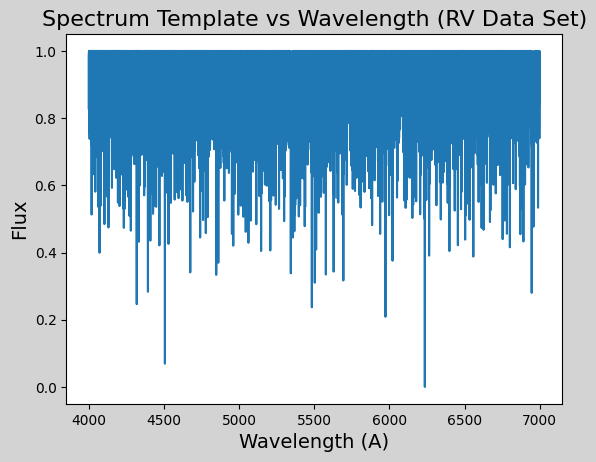

<Figure size 640x480 with 0 Axes>

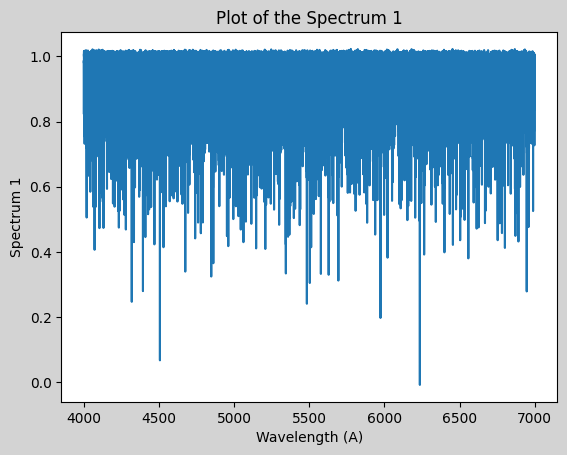

In [7]:
#plotting up the spectrum template vs wavelength and spectrum 1 vs wavelength to compare
fig, ax = plt.subplots(facecolor = 'lightgrey')
plt.plot(wl, spec_template)
plt.xlabel('Wavelength (A)', fontsize = '14')
plt.ylabel('Flux', fontsize = '14')
plt.title('Spectrum Template vs Wavelength (RV Data Set)', fontsize = '16')


plt.figure()
fig, ax = plt.subplots(facecolor = 'lightgrey')
plt.plot(wl, rv_data['spectrum_1'])
plt.xlabel('Wavelength (A)')
plt.ylabel('Spectrum 1')
plt.title('Plot of the Spectrum 1')

In [8]:
#defining a list of the spectra in the rv data set
spectra_list = rv_list[3: :2]
print(spectra_list)

#to find how many spectra
print('Number of spectra in rv data set = ', len(spectra_list))

['spectrum_1', 'spectrum_2', 'spectrum_3', 'spectrum_4', 'spectrum_5', 'spectrum_6', 'spectrum_7', 'spectrum_8', 'spectrum_9', 'spectrum_10', 'spectrum_11', 'spectrum_12', 'spectrum_13', 'spectrum_14', 'spectrum_15', 'spectrum_16', 'spectrum_17', 'spectrum_18', 'spectrum_19', 'spectrum_20', 'spectrum_21', 'spectrum_22', 'spectrum_23', 'spectrum_24', 'spectrum_25', 'spectrum_26', 'spectrum_27', 'spectrum_28', 'spectrum_29', 'spectrum_30', 'spectrum_31', 'spectrum_32', 'spectrum_33', 'spectrum_34', 'spectrum_35', 'spectrum_36', 'spectrum_37', 'spectrum_38', 'spectrum_39', 'spectrum_40']
Number of spectra in rv data set =  40


In [8]:
#executing cross correlation between each spectrum and the spectrum template
correlation_list = []

for i in spectrum_list:
    correlate = np.correlate(spec_template, i, 'same')
    correlation_list.append(correlate)


Text(0.5, 1.0, 'Velocity vs Cross-Correlation between Spectrum Template and Spectrum 1')

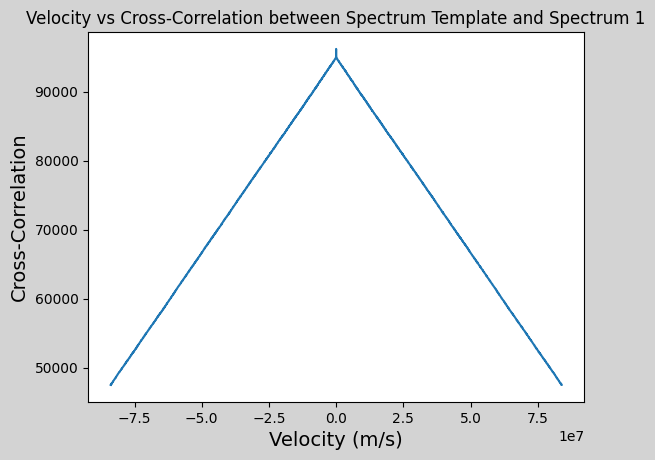

In [9]:
#plotting up the cross correlation for one spectrum
fig, ax = plt.subplots(facecolor='lightgrey')
plt.plot(vel, correlate)
plt.xlabel('Velocity (m/s)', fontsize = '14')
plt.ylabel('Cross-Correlation', fontsize = '14')
plt.title('Velocity vs Cross-Correlation between Spectrum Template and Spectrum 1')

In [10]:
#normalising both the spectrum template and all the spectra
normalised_spec_template = spec_template - spec_template.mean()

norm_spec_list = []
for i in spectrum_list:
    normalised_spectrum = i - i.mean()
    norm_spec_list.append(normalised_spectrum)


In [11]:
#executing the cross correlation again between the normalised spectra
norm_cor_list = []
for i in norm_spec_list:
    correlate_normalised = np.correlate(normalised_spec_template, i, 'same')
    norm_cor_list.append(correlate_normalised)


In [1]:
#plotting up the normalised cross correlation
#using mpld3.display() to provide means of zooming in and out on the plot
fig, ax = plt.subplots(facecolor='lightgrey')
plt.plot(vel, correlate_normalised)
plt.xlabel('Velocity (m/s)', fontsize = '14')
plt.ylabel('Cross-Correlation', fontsize = '14')
plt.title('Velocity vs Normalised Cross-Correlation between Spectrum Template and Spectrum 1')
mpld3.display()

NameError: name 'plt' is not defined

Text(0.5, 1.0, 'RV Curve')

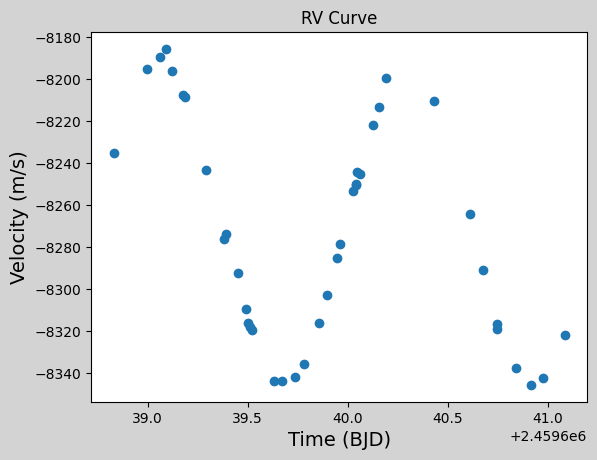

In [13]:
#fitting a Gaussian to the normalised plot in order to
#locate the maximum value of the correlation

#This is necessary to find the velocity shift

#defining lists that will be appended
fitted_amplitudes = []
fitted_centers = []
fitted_widths = []

#defining the Gaussian function
def gaussian(x, amp, cen, wid):
    return (amp / (np.sqrt(2 * np.pi) * wid))* np.exp(-(x - cen)**2 / (2*wid**2))

#defining the initial guess manually
initial_guess = [1210, 4496.89, 1000]

#optimizing the guess
for data_set in norm_cor_list:
    popt, pcov = opt.curve_fit(gaussian, vel, data_set, p0 = initial_guess)

    #Extract fitted parameters
    amp_fit, cen_fit, wid_fit = popt

    #Append fitted parameters to lists
    fitted_amplitudes.append(amp_fit)
    fitted_centers.append(cen_fit)
    fitted_widths.append(wid_fit)

#creating a list that contains only the time stamps
time_list = []
for i in range(0,40):
    time = rv_data['time_BJD_' + str(i+1)]
    time_list.append(time)

#plot the the time list against the fitted centers to achieve the RV curve
fig, ax = plt.subplots(facecolor='lightgrey')
plt.scatter(time_list, fitted_centers)
plt.xlabel('Time (BJD)', fontsize = 14)
plt.ylabel('Velocity (m/s)', fontsize = 14)
plt.title('RV Curve')
    

In [14]:
#load the transit data and print the keys
transit_data = np.load('JSAstroLab2024_transit_data_21364029(1).npz')
print(list(transit_data.keys()))

['time', 'flux', 'P']


In [15]:
#define the parameters
time, flux, P = transit_data['time'], transit_data['flux'], transit_data['P']

Text(0.5, 1.0, 'Transit Data')

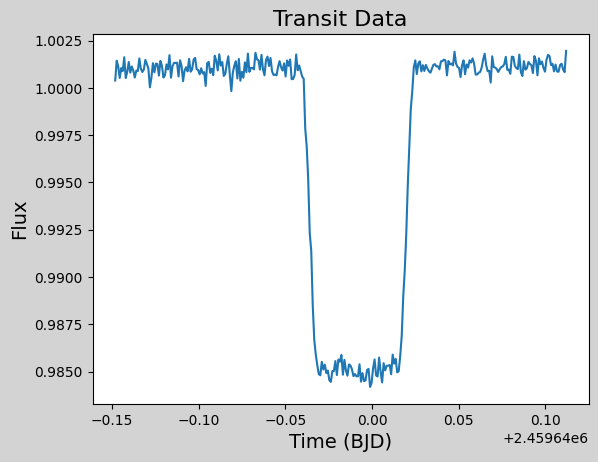

In [16]:
#plot up the transit data
fig, ax = plt.subplots(facecolor='lightgrey')
plt.plot(time,flux)
plt.xlabel('Time (BJD)', fontsize = '14')
plt.ylabel('Flux', fontsize = '14')
plt.title('Transit Data', fontsize = '16')

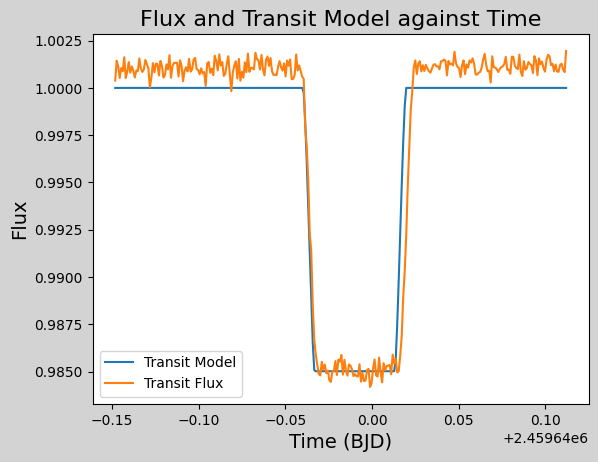

In [17]:
#Define the model parameters, guessing those that are not given
T_0 = 0.01 + 2.45964*10**(6)
P = 1.2410229010231413
a_over_Rstar = 6
rho = 0.5
i = 45
f_oot = 1
t = time

#define the function z(t)
def z(t):
    z = a_over_Rstar*(np.sqrt(np.sin(phi)**2 + (np.cos(phi)*np.cos(i))**2))
    return z

#define the transit function
def transit(g, t):
    phi = (2*np.pi/P)*(t - g[0])
    z = g[1]*(np.sqrt(np.sin(phi)**2 + (np.cos(phi)*np.cos(np.deg2rad(g[3])))**2))
    #print(phi,z)
    index = ((z>1-g[2])*(z<=1+g[2]))
    k_0 = np.arccos((g[2]**2 + z[index]**2 - 1)/(2*g[2]*z[index]))
    k_1 = np.arccos((1 - g[2]**2 + z[index]**2)/(2*z[index]))
    l = (1/np.pi)*(g[2]**2*k_0 + k_1-np.sqrt((4*z[index]**2-(1 + z[index]**2 - g[2]**2)**2)/4))
    f = np.ones(t.size)
    f[z<=1-g[2]] = 1 - g[2]**2
    f[z>1+g[2]] = 1
    f[index] = 1 - l
    return f * g[4]

#guess = T_0, a_over_Rstar_, rho, i, f_oot
guess = np.array([-0.01 + 2.45964*10**(6), 7.5, 0.1224, 90, 1])

#plot the transit model and the flux together
fig, ax = plt.subplots(facecolor='lightgrey')
plt.xlabel('Time (BJD)', fontsize = '14')
plt.ylabel('Flux', fontsize = '14')
plt.plot(t, transit(guess, t), label='Transit Model')
plt.plot(time, flux, label = 'Transit Flux')
plt.title('Flux and Transit Model against Time', fontsize = '16')
plt.legend()

In [18]:
'''#To test the model for z<=1-rho and z>1+rho

g = np.array([-0.01 + 2.45964*10**(6), 7, 0.122, 90])

phi = (2*np.pi/P)*(time - g[0])
z1 = g[1]*(np.sqrt(np.sin(phi)**2 + (np.cos(phi)*np.cos(np.deg2rad(g[3])))**2))

f = np.ones(t.size)
f[z1<=1-g[2]] = 1 - g[2]**2

plt.plot(t, f)
plt.plot(time,flux)'''

'#To test the model for z<=1-rho and z>1+rho\n\ng = np.array([-0.01 + 2.45964*10**(6), 7, 0.122, 90])\n\nphi = (2*np.pi/P)*(time - g[0])\nz1 = g[1]*(np.sqrt(np.sin(phi)**2 + (np.cos(phi)*np.cos(np.deg2rad(g[3])))**2))\n\nf = np.ones(t.size)\nf[z1<=1-g[2]] = 1 - g[2]**2\n\nplt.plot(t, f)\nplt.plot(time,flux)'

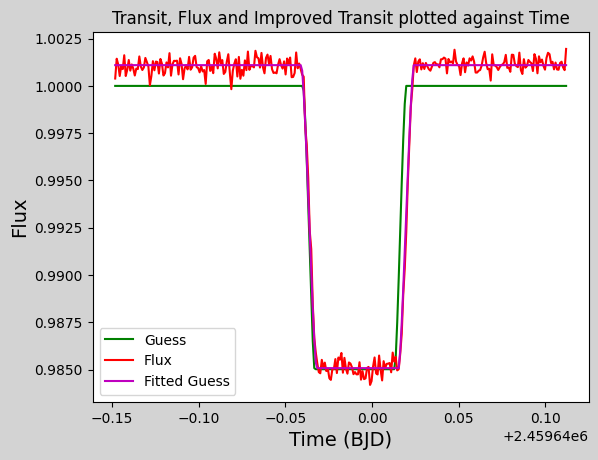

Radius of the planet = 56833.87812 km
guess fit = [2.45963999e+06 6.42310101e+00 1.26506601e-01 9.37382343e+01
 1.00109778e+00]


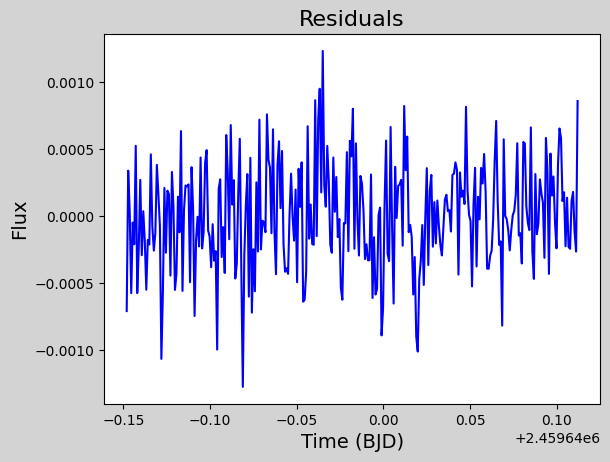

In [20]:
#define the residuals to improve the model
def residuals(guess, transit, t, flux, s=1):
    return (flux - transit(guess, t)) / s

#perform least squares method
result = opt.least_squares(residuals, guess, args = (transit, t, flux))

#extract the improved guess
guess_fit = result.x

#plot the original guess, improved guess fit and flux
fig, ax = plt.subplots(facecolor='lightgrey')
plt.plot(time,transit(guess, t), 'g-', label = 'Guess')
plt.plot(time,flux, 'r-', label = 'Flux')
plt.plot(time,transit(guess_fit, t), 'm-', label = 'Fitted Guess')
plt.xlabel('Time (BJD)', fontsize = '14')
plt.ylabel('Flux', fontsize = '14')
plt.title('Transit, Flux and Improved Transit plotted against Time')
plt.legend()
plt.show()

#plot the residuals to determine the accuracy of the improved guess fit
fig, ax = plt.subplots(facecolor='lightgrey')
plt.plot(time,residuals(guess_fit, transit, t, flux), 'b-', label='residuals')
plt.xlabel('Time (BJD)', fontsize = '14')
plt.ylabel('Flux', fontsize = '14')
plt.title('Residuals', fontsize = '16')

#To find the radius of the planet

rho_new = 0.122

R_sun = 696340 #km

R_star = 0.669*R_sun

R_planet = rho_new*R_star

print('Radius of the planet =', R_planet, 'km')

print('guess fit =', guess_fit)

In [24]:
#To see how much the guess fit changes wrt guess
print(guess - result.x)

[-1.70675525e-03  1.07689899e+00 -4.10660073e-03 -3.73823432e+00
 -1.09777822e-03]


In [25]:
#load the data and print the keys
rv_data = np.load('JSAstroLab2024_rv_data_21364029.npz')
print(list(rv_data.keys()))

['wavelength', 'velocity', 'spec_template', 'spectrum_1', 'time_BJD_1', 'spectrum_2', 'time_BJD_2', 'spectrum_3', 'time_BJD_3', 'spectrum_4', 'time_BJD_4', 'spectrum_5', 'time_BJD_5', 'spectrum_6', 'time_BJD_6', 'spectrum_7', 'time_BJD_7', 'spectrum_8', 'time_BJD_8', 'spectrum_9', 'time_BJD_9', 'spectrum_10', 'time_BJD_10', 'spectrum_11', 'time_BJD_11', 'spectrum_12', 'time_BJD_12', 'spectrum_13', 'time_BJD_13', 'spectrum_14', 'time_BJD_14', 'spectrum_15', 'time_BJD_15', 'spectrum_16', 'time_BJD_16', 'spectrum_17', 'time_BJD_17', 'spectrum_18', 'time_BJD_18', 'spectrum_19', 'time_BJD_19', 'spectrum_20', 'time_BJD_20', 'spectrum_21', 'time_BJD_21', 'spectrum_22', 'time_BJD_22', 'spectrum_23', 'time_BJD_23', 'spectrum_24', 'time_BJD_24', 'spectrum_25', 'time_BJD_25', 'spectrum_26', 'time_BJD_26', 'spectrum_27', 'time_BJD_27', 'spectrum_28', 'time_BJD_28', 'spectrum_29', 'time_BJD_29', 'spectrum_30', 'time_BJD_30', 'spectrum_31', 'time_BJD_31', 'spectrum_32', 'time_BJD_32', 'spectrum_33',

Improved Parameters = [ 7.86276964e+01  4.70000035e+00  1.41209612e+00 -8.26663510e+03]
Fitted Parameters:
Amplitude = 78.62769639143524
Frequency = 4.700000346705585
Phase = 1.4120961238404832
Vertical Shift = -8266.635097611346
p[0] = 78.627696+-0.340553
p[1] = 4.700000+-191.109006
p[2] = 1.412096+-0.772410
p[3] = -8266.635098+-641.607464


Text(0.5, 1.0, 'A Comparison of the RV Curve and its Fitted Function')

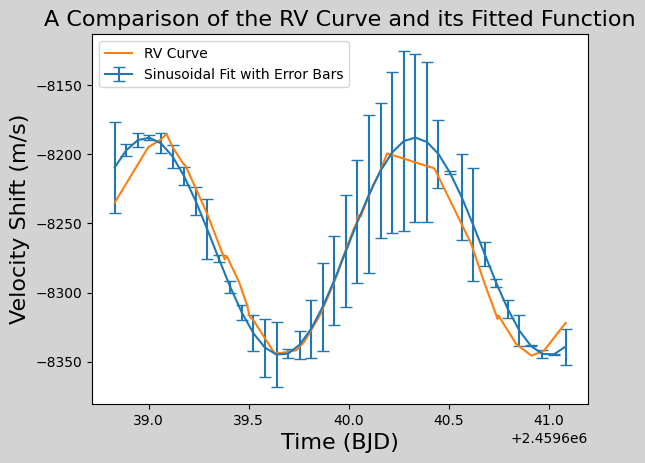

In [26]:
#Fit a function to the RV curve

#defining x and y data
x_data = np.array(time_list)
y_data = np.array(fitted_centers)

#define the sin function
def sin(x, amp, freq, phase, vert):
    return amp*np.sin(freq*x + phase*np.pi) + vert

#Defining a second residuals for clarity purposes
def residuals2(p0, sin, x, fitted_centers, s=1):
    return (fitted_centers - sin(x, p0[0], p0[1], p0[2], p0[3]))/s

#defining an orginal guess 
p0 = np.array([80, 4.7, 1.7, -8263])

#extracting improved parameters using curve fit
params, params_covariance = opt.curve_fit(sin, x_data, y_data, p0 = p0)

#defining a linspace for the x values
x = np.linspace(min(x_data), max(x_data), len(fitted_centers))


#defining an improved sin function using the parameters
yfit = sin(x, params[0], params[1], params[2], params[3])
print('Improved Parameters =', params)

#defining error bars
error_bars = np.array([ np.abs(x) for x in residuals2(p0, sin, x, fitted_centers, s=1)] )

#finding the period
period = 2*np.pi/(params[1])

#Ectract fitted parameters 
print('Fitted Parameters:')
print('Amplitude =', params[0])
print('Frequency =', params[1])
print('Phase =', params[2])
print('Vertical Shift =', params[3])

#Estimating the Hessian matrix to calculate the standard errors
H = np.dot(result.jac.T, result.jac)
K_fit = np.linalg.inv(H)
e_fit = np.sqrt(np.diag(K_fit))

#Print fitted parameters with errors
for i in range(params.size):
    print('p[{}] = {:3f}+-{:3f}'.format(i, params[i], e_fit[i]))
    
#plotting the RV curve with the sin model and its error bars 
#(error bars automatically plots the sin model)

fig, ax = plt.subplots(facecolor='lightgrey')
plt.errorbar(x, yfit, error_bars, capsize = 4, label = 'Sinusoidal Fit with Error Bars')
#plt.plot(x, yfit, 'r', label = 'Fitted Function')
plt.plot(time_list, fitted_centers, label = 'RV Curve')
plt.legend()
plt.xlabel('Time (BJD)', fontsize = '16')
plt.ylabel('Velocity Shift (m/s)', fontsize = '16')
plt.title('A Comparison of the RV Curve and its Fitted Function', fontsize = '16')

In [31]:
#to find the 'phase-folded' RV curve
x_repeat = []
y_repeat = []
for i,t in enumerate(x):
    if t % period == 0:
        x_repeat.append(np.nan)
        y_repeat(np.nan)
    else:
        x_repeat.append(t% period)
        y_repeat.append(yfit[i])

Text(0.5, 1.0, 'The Phase-Folded RV Curve i.e One Orbital Period')

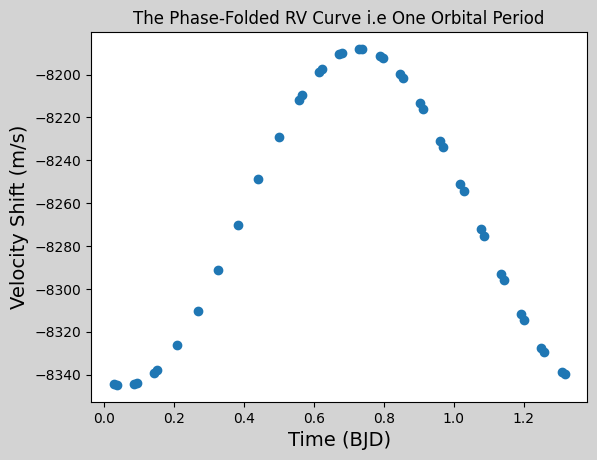

In [32]:
#plotting the phase folded RV curve
fig, ax = plt.subplots(facecolor='lightgrey')
plt.scatter(x_repeat, y_repeat)
plt.xlabel('Time (BJD)', fontsize = '14')
plt.ylabel('Velocity Shift (m/s)', fontsize = '14')
plt.title('The Phase-Folded RV Curve i.e One Orbital Period')

In [33]:
#And since the amplitude of this is K_star
K_star = 78.6276964
M_sun = 1.989*10**30
M_star = 0.69*M_sun
G = 6.67430*10**(-11)
P = 1.2410229*24*60*60
i = 93.738
#To determine the minimum mass M_planet occurs when sin(i) = 1, i = 90 degrees
min_mass = ((K_star*(M_star)**(2/3))/np.sin(i))*(1/(((2*np.pi*G)/P)**(1/3)))

print('Minimum mass of the planet = ', min_mass, 'kg')

Minimum mass of the planet =  -1.2629739985330733e+27 kg


Is this a linear or non-linear model?
The restrictions for a linear model are:
1. Superposition: f(x + y) = f(x) + f(y) for all x and y.
2. Homogeneity: f(cx) = cf(x) for all x and scalars c.


Since neither of these apply for a sine wave, this model is non-linear.

Systemic velocity = - 8263 m/s. Moving towards the observer.